In [1]:
import numpy as np
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import new_alg_v1 as na
import new_alg_v2 as na2
import new_alg_v3 as na3
from tqdm import tqdm
import matplotlib.pyplot as plt

In [25]:
output_dim = 10
# defining the network
class Net(nn.Module):

  def __init__(self, n):
    super().__init__()
    torch.manual_seed(13)
    self.fc1 = nn.Linear(n, 2*n, bias=False)
    self.fc1.weight.data.normal_(0, 1/np.sqrt(n))
    self.fc2 = nn.Linear(2*n, 2*n, bias=False)
    self.fc2.weight.data.normal_(0, 1/np.sqrt(n))
    self.fc3 = nn.Linear(2*n, 2*n, bias=False)
    self.fc3.weight.data.normal_(0, 1/np.sqrt(n))
    self.fc4 = nn.Linear(2*n, output_dim, bias=False)
    self.fc4.weight.data.normal_(0, 1/np.sqrt(n))

    


  def forward(self, x):
    x = self.fc1(x)
    x = self.fc2(x)
    x = self.fc3(x)
    z_hat = self.fc4(x)
    return z_hat

---
# V1

In [3]:
n = 1000
x_vec = torch.randn(n)
z = torch.ones(output_dim)
net = Net(n)

w1_init = net.fc1.weight.clone()
w2_init = net.fc2.weight.clone()
w3_init = net.fc3.weight.clone()
w4_init = net.fc4.weight.clone()


# defining loss function and optimization algorithm 
loss_f = nn.MSELoss()
lr = 0.01
optimizer = na.new_alg(net.parameters(), lr)

# training the net
steps = 80
losses = []
for i in range(steps):
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    z_hat = net(x_vec)
    loss = loss_f(z_hat, z)
    losses.append(float(loss))
    loss.backward()
    optimizer.step()

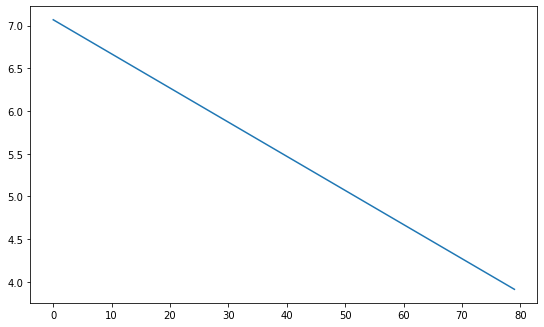

In [4]:
losses = np.array(losses)
steps_vec = np.arange(0,steps,1)

fig = plt.figure(figsize=(20, 12))
ax1 = fig.add_subplot(221)
ax1.plot(steps_vec, losses)

In [5]:
w1_final = net.fc1.weight.clone()
w2_final = net.fc2.weight.clone()
w3_final = net.fc3.weight.clone()
w4_final = net.fc4.weight.clone()

#init weights fc1
with torch.no_grad():
  net.fc1.weight[:] = w1_init

z_hat = net(x_vec)
loss1 = loss_f(z_hat, z)


#init weights fc2
with torch.no_grad():
  net.fc1.weight[:] = w1_final
  net.fc2.weight[:] = w2_init

z_hat = net(x_vec)
loss2 = loss_f(z_hat, z)

#init weights fc3
with torch.no_grad():
  net.fc2.weight[:] = w2_final
  net.fc3.weight[:] = w3_init

z_hat = net(x_vec)
loss3 = loss_f(z_hat, z)

#init weights fc4
with torch.no_grad():
  net.fc3.weight[:] = w3_final
  net.fc4.weight[:] = w4_init

z_hat = net(x_vec)
loss4 = loss_f(z_hat, z)

print("loss1 = ", float(loss1))
print("loss2 = ", float(loss2))
print("loss3 = ", float(loss3))
print("loss4 = ", float(loss4))
print("inital loss = ", float(losses[0]))

loss1 =  4.579692840576172
loss2 =  4.580399513244629
loss3 =  4.580599784851074
loss4 =  4.57999849319458
inital loss =  7.067375183105469


In [6]:
fc_v1_params = optimizer.param_groups[0]['params']
len(fc_v1_params[3])

10

In [7]:
params = optimizer.param_groups[0]['params']
len(params)
p0 = params[0]
len(p0)

2000

In [8]:
w1_final = net.fc1.weight.clone()
w2_final = net.fc2.weight.clone()

#init weights
with torch.no_grad():
  net.fc1.weight[:] = w1_init

z_hat = net(x_vec)
loss1 = loss_f(z_hat, z)


#init weights
with torch.no_grad():
  net.fc1.weight[:] = w1_final
  net.fc2.weight[:] = w2_init

z_hat = net(x_vec)
loss2 = loss_f(z_hat, z)

print("loss1 = ", float(loss1))
print("loss2 = ", float(loss2))
print("inital loss = ", float(losses[0]))

loss1 =  5.348295211791992
loss2 =  5.348773002624512
inital loss =  7.067375183105469


---
# v2

In [30]:
net = Net(n)

w1_init = net.fc1.weight.clone()
w2_init = net.fc2.weight.clone()
lr = 0.0001

# defining loss function and optimization algorithm 
loss_f = nn.MSELoss()
optimizer = na2.new_alg(net.parameters(), lr)

# training the net
steps = 20
losses = []
for i in range(steps):
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    z_hat = net(x_vec)
    loss = loss_f(z_hat, z)
    losses.append(float(loss))
    loss.backward()
    optimizer.step()

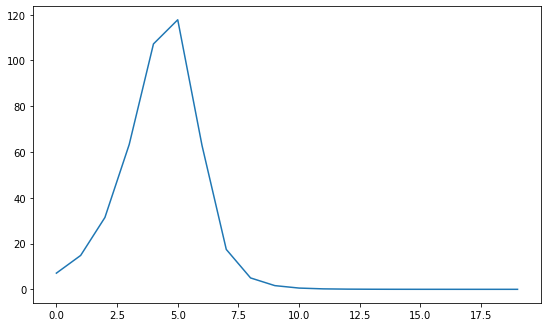

In [31]:
losses = np.array(losses)
steps_vec = np.arange(0,steps,1)

fig = plt.figure(figsize=(20, 12))
ax1 = fig.add_subplot(221)
ax1.plot(steps_vec, losses)

In [32]:
w1_final = net.fc1.weight.clone()
w2_final = net.fc2.weight.clone()

#init weights
with torch.no_grad():
  net.fc1.weight[:] = w1_init

z_hat = net(x_vec)
loss1 = loss_f(z_hat, z)


#init weights
with torch.no_grad():
  net.fc1.weight[:] = w1_final
  net.fc2.weight[:] = w2_init

z_hat = net(x_vec)
loss2 = loss_f(z_hat, z)

print("loss1 = ", float(loss1))
print("loss2 = ", float(loss2))
print("inital loss = ", float(losses[0]))

loss1 =  0.19791874289512634
loss2 =  0.22261011600494385
inital loss =  7.067375183105469


---
# V3

In [42]:
net = Net(n)

w1_init = net.fc1.weight.clone()
w2_init = net.fc2.weight.clone()
lr = 0.000001

# defining loss function and optimization algorithm 
loss_f = nn.MSELoss()
optimizer = na3.new_alg(net.parameters(), lr)

# training the net
steps = 200
losses = []
for i in range(steps):
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    z_hat = net(x_vec)
    loss = loss_f(z_hat, z)
    losses.append(float(loss))
    loss.backward()
    optimizer.step()

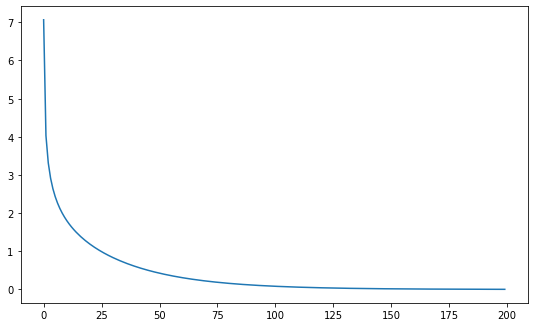

In [43]:
losses = np.array(losses)
steps_vec = np.arange(0,steps,1)

fig = plt.figure(figsize=(20, 12))
ax1 = fig.add_subplot(221)
ax1.plot(steps_vec, losses)

In [45]:
w1_final = net.fc1.weight.clone()
w2_final = net.fc2.weight.clone()

#init weights
with torch.no_grad():
  net.fc1.weight[:] = w1_init

z_hat = net(x_vec)
loss1 = loss_f(z_hat, z)


#init weights
with torch.no_grad():
  net.fc1.weight[:] = w1_final
  net.fc2.weight[:] = w2_init

z_hat = net(x_vec)
loss2 = loss_f(z_hat, z)

print("loss1 = ", float(loss1))
print("loss2 = ", float(loss2))
print("inital loss = ", float(losses[0]))
print("final loss = ", float(losses[-1]))

loss1 =  1.7956082820892334
loss2 =  0.4955110549926758
inital loss =  7.067375183105469
final loss =  0.0033819363452494144


---
# CNN - MNIST

In [15]:
import numpy as np
import torch
# MNIST dataset
from torchvision.datasets import MNIST, FashionMNIST
from torchvision import transforms
    
def define_dataloaders(n_examples_train, n_examples_test, batch_size, classes=np.arange(10), zscore_images=True):
    # MNIST data, batch training
    #batch_size = n_examples_train

    # Choose the classes (at most 10)
    assert max(classes) <= 9

    # Transformation for the images
    transform = transforms.Compose([transforms.ToTensor(),
                                  transforms.Normalize((0.5,), (0.5,)),
                                  ])
    trainset = MNIST(data_dir, download=True, train=True, transform=transform)
    testset = MNIST(data_dir, download=True, train=False, transform=transform)

    # Obtain training and test data. 
    # Note that both datasets are sorted, but the train and test loaders will shuffle them during training.
    n_examples_tt = [n_examples_train, n_examples_test]
    for i_d, (n_examples_i, dataset) in enumerate(zip(n_examples_tt, [trainset, testset])):
        n_per_class = n_examples_i // len(classes)
        data_orig = dataset.data.detach().clone()
        targets_orig = dataset.targets.detach().clone()
        for i_c, class_i in enumerate(classes):
            mask = targets_orig == class_i
            i0 = i_c * n_per_class
            i1 = (i_c+1) * n_per_class
            dataset.data[i0:i1] = data_orig[mask][:n_per_class]
            dataset.targets[i0:i1] = targets_orig[mask][:n_per_class]
        # Fill the remaining slots with random classes from the available choices
        n_remain = n_examples_i - i1 
        for i in range(n_remain):
            class_i = np.random.choice(classes)
            mask = targets_orig == class_i
            idx_i = np.random.choice(torch.where(mask)[0].cpu())
            dataset.data[i1+i] = data_orig[idx_i]
            dataset.targets[i1+i] = targets_orig[idx_i]

        # Cut off
        dataset.data = dataset.data[:n_examples_i]
        dataset.targets = dataset.targets[:n_examples_i]

    # Batch-loader
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
    testloader = torch.utils.data.DataLoader(testset, batch_size=n_examples_test, shuffle=False, num_workers=0)

    return trainloader, testloader

## Settings:
- no dropout
- no momentum
- increased number of fetures/filters

In [16]:
learning_rate = 0.01
momentum = 0
n_epochs = 100
log_interval = 10

In [17]:
#Building the Network

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5, bias=False)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5, bias=False)
        self.fc1 = nn.Linear(320, 50, bias=False)
        self.fc2 = nn.Linear(50, 10, bias=False)

    def forward(self, x):
        x = torch.tanh(F.max_pool2d(self.conv1(x), 2))
        x = torch.tanh(F.max_pool2d((self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = torch.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

In [18]:
network = Net()
optimizer = na2.new_alg(network.parameters(), lr=learning_rate, momentum=momentum)
loss_f=nn.CrossEntropyLoss()

In [19]:
data_dir = '/files/'
batch_size = 64
n_examples_train = 4*batch_size
n_examples_test = 1024
train_loader, test_loader =  define_dataloaders(n_examples_train, n_examples_test, batch_size)

train_losses = []
train_accuracy = []
train_counter = []
test_losses = []
test_accuracy = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [20]:
def train(epoch):
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = loss_f(output,target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      train_losses.append(loss.item())
      train_counter.append((batch_idx*batch_size) + ((epoch-1)*len(train_loader.dataset)))
  
  correct = 0
  with torch.no_grad():
    for data, target in train_loader:
      output = network(data)
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  train_accuracy.append(100. * correct / len(train_loader.dataset))

In [21]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += loss_f(output,target)
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader)
  test_losses.append(test_loss)
  test_accuracy.append(100. * correct / len(test_loader.dataset))

In [22]:
a = test_loader.dataset.data[0]
a.shape
for batch_idx, (data, target) in enumerate(train_loader):
    d = data
    break

type(data)
data.shape

torch.Size([64, 1, 28, 28])

In [23]:
conv1_init = network.conv1.weight.clone()
conv2_init = network.conv2.weight.clone()
fc1_init = network.fc1.weight.clone()
fc2_init = network.fc2.weight.clone()

In [ ]:
test()
for epoch in tqdm(range(1, n_epochs + 1)):
  train(epoch)
  test()

In [ ]:
for data, target in test_loader:
    a=target

type(a)
a.size()
a

tensor([0, 0, 0,  ..., 1, 7, 5])

Text(0, 0.5, 'loss')

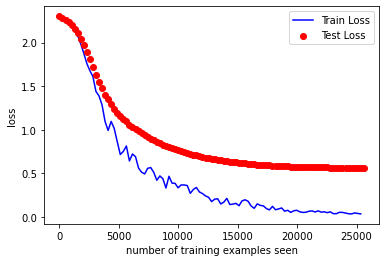

In [ ]:
# LOSS
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue', zorder=1)
plt.scatter(test_counter, test_losses, color='red', zorder=2)
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('loss')

Text(0, 0.5, 'Accuracy')

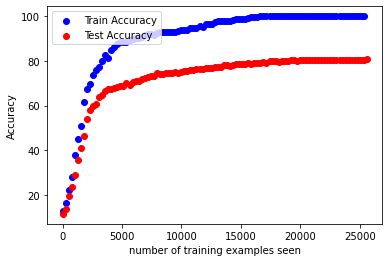

In [ ]:
# ACCURACY

fig = plt.figure()
plt.scatter(test_counter[:-1], train_accuracy, color='blue', zorder=1)
plt.scatter(test_counter, test_accuracy, color='red', zorder=2)
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='upper left')
plt.xlabel('number of training examples seen')
plt.ylabel('Accuracy')

In [ ]:
conv1_final = network.conv1.weight.clone()
conv2_final = network.conv2.weight.clone()
fc1_final = network.fc1.weight.clone()
fc2_final = network.fc2.weight.clone()

#init weights conv1
with torch.no_grad():
  network.conv1.weight[:] = conv1_init

test()
loss_conv1 = test_losses[-1]

#init weights conv2
with torch.no_grad():
  network.conv1.weight[:] = conv1_final
  network.conv2.weight[:] = conv2_init

test()
loss_conv2 = test_losses[-1]

#init weights fc1
with torch.no_grad():
  network.conv2.weight[:] = conv2_final
  network.fc1.weight[:] = fc1_init

test()
loss_fc1 = test_losses[-1]

#init weights fc2
with torch.no_grad():
  network.fc1.weight[:] = fc1_final
  network.fc2.weight[:] = fc2_init

test()
loss_fc2 = test_losses[-1]

print("loss conv1 = ", float(loss_conv1))
print("loss conv2 = ", float(loss_conv2))
print("loss fc1 = ", float(loss_fc1))
print("loss fc2 = ", float(loss_fc2))
print("inital loss = ", float(train_losses[0]))


loss conv1 =  0.8638002872467041
loss conv2 =  1.0273529291152954
loss fc1 =  0.9748395085334778
loss fc2 =  1.4053107500076294
inital loss =  2.284952163696289
